**TASK2: Supervised Machine Learning**

**Importing Essential Libraries**

In [26]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Importing Dataset**

In [3]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

**Understanding Dataset**

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [18]:
data.shape

(25, 2)

In [19]:
data.nunique()

Hours     23
Scores    23
dtype: int64

Data Observation :
There are two variables:1.Hours :Independent var
                        2.Scores:Target Var

In [20]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

No null values so we can proceed further

**Correlation**

In [25]:
correlation=data.corr()
correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


There is highly Positive correlation between Hours and Scores.

**Data visualization:**
      

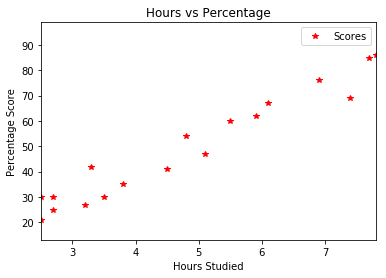

In [7]:
data.plot(x='Hours', y='Scores', style='*r')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

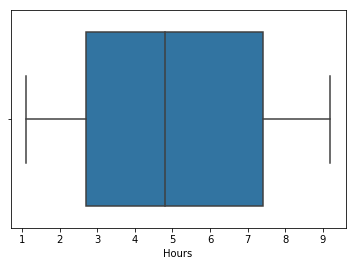

In [27]:
sns.boxplot(data['Hours'])

**Data Bifurication**

Dividing data sets into two parts namely Train and test data

In [8]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Model Building and Plotting Regression Line**

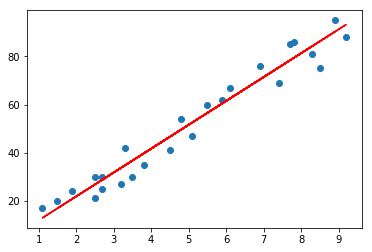

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X,y)
plt.plot(X, line, color='red');
plt.show()

In [12]:
print(regressor.intercept_)

2.01816004143


In [13]:
print(regressor.coef_)

[ 9.91065648]


In [14]:
y_pred = regressor.predict(X_test)

In [15]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Model Evaluation**

In [16]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899
Mean Squared Error: 21.5987693072
Root Mean Squared Error: 4.6474476121


**Predicting new test Data**

In [17]:
hours =  [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538
